# Week 15 Neural network and Gaussian Process

## The family of general functions machine learning.
We talked about the 5 basic building blocks for general machine learning tasks, and one of them is the 'model', which is a function with input X and output y, i.e. $y=f(x)$. In linear regression we learned the model is linear function, $y=Wx+b$; in polynomial regression, $y=w_px^p+x_{p-1}x^{p-1}+\cdots+w_1x+b$; in logistic regression, $y=\frac{1}{1+\exp(-wx-b)}$.
In this notebook, we focus on two popular families of functions:
 - Neural network
 - Gaussian Process

As a demonstration, we show the performances of 1) neural netowrk 2) gaussian process and 3) random forest on classifying two dimensional data with two classes.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline

In [2]:
alphas = np.logspace(-1, 1, 5)

In [3]:
alphas

array([ 0.1       ,  0.31622777,  1.        ,  3.16227766, 10.        ])

## Define a neural network classifier

In [4]:
alpha = alphas[1]

classifiers = []

classifiers.append(make_pipeline(StandardScaler(),
        MLPClassifier(
            solver='lbfgs', alpha=alpha, random_state=1, max_iter=2000,
            early_stopping=True, hidden_layer_sizes=[100, 100],
        )
    ))

In [5]:
classifiers[0]

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(alpha=0.31622776601683794, early_stopping=True,
                               hidden_layer_sizes=[100, 100], max_iter=2000,
                               random_state=1, solver='lbfgs'))])

## Generate two-dimensional data (x has two features, y being 0 and 1)

In [7]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=0, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)

In [10]:
X.shape

(100, 2)

In [12]:
X[:10,:]

array([[ 0.26657401,  1.34856054],
       [ 2.45422481,  0.82376731],
       [ 2.62111035,  1.7605275 ],
       [ 1.84591192,  2.04618256],
       [ 1.32097884,  1.70181469],
       [ 3.97616763, -1.07822436],
       [ 2.70215442, -0.4600292 ],
       [ 2.40471028,  2.59745805],
       [ 2.97981765, -0.51666779],
       [ 2.62307329,  1.26492508]])

In [11]:
y.shape

(100,)

In [13]:
y[:10]

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1])

## Visualize the data

(-2.5031712438256966, 3.5568287561743093)

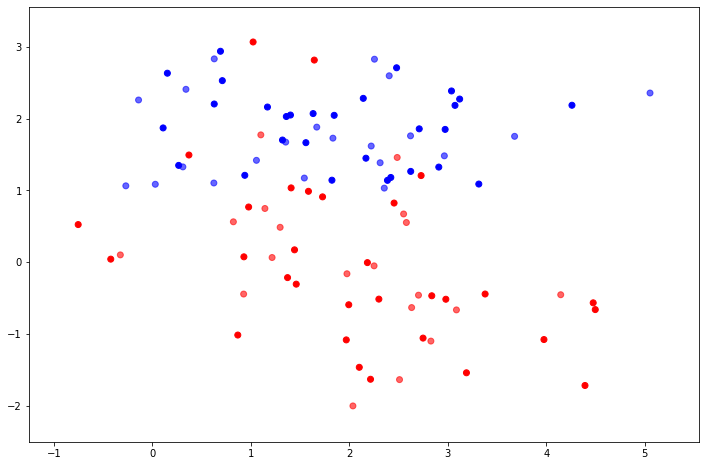

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                         np.arange(y_min, y_max, .02))


#figure = plt.figure(figsize=(17, 9))

plt.rcParams["figure.figsize"] = (12,8)

# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
#ax = plt(len(datasets), len(classifiers) + 1)

# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)

# and testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#plt.xticks(())
#plt.yticks(())

## Training the model, prediction, and visualize the prediction.

(-2.5031712438256966, 3.5568287561743093)

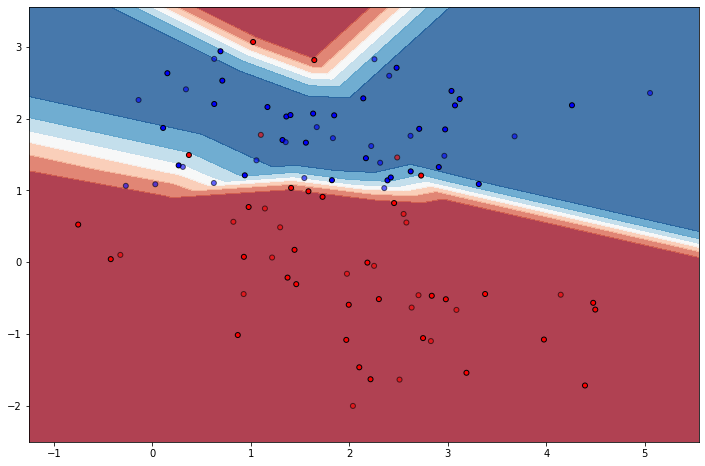

In [9]:
classifiers[0].fit(X_train, y_train)
score = classifiers[0].score(X_test, y_test)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max] x [y_min, y_max].
if hasattr(classifiers[0], "decision_function"):
    Z = classifiers[0].decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = classifiers[0].predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='black', s=25)
# and testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors='black', s=25)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#ax.set_xticks(())
#ax.set_yticks(())
#ax.set_title(name)
#ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),size=15, horizontalalignment='right')

## Gaussian Process Classifier

In [14]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

In [15]:
classifiers.append(GaussianProcessClassifier(1.0 * RBF(1.0)))

In [16]:
classifiers[1]

GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1))

(-2.5031712438256966, 3.5568287561743093)

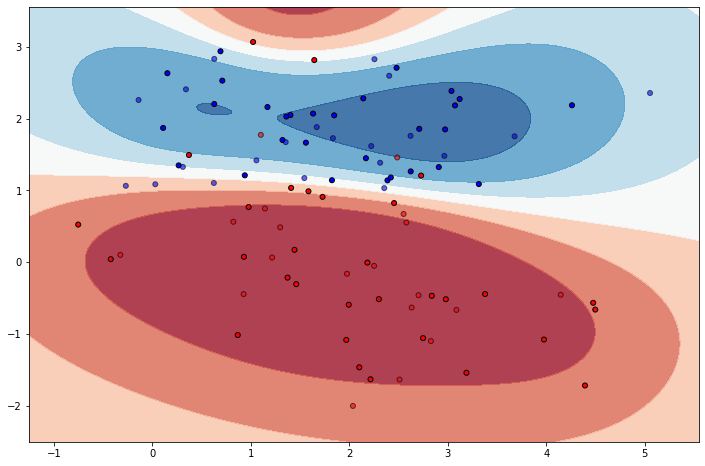

In [17]:
classifiers[1].fit(X_train, y_train)
score = classifiers[1].score(X_test, y_test)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max] x [y_min, y_max].
if hasattr(classifiers[1], "decision_function"):
    Z = classifiers[1].decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = classifiers[1].predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='black', s=25)
# and testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors='black', s=25)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

## Random Forest classifier

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

classifiers.append(RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1))

In [19]:
classifiers[2]

RandomForestClassifier(max_depth=5, max_features=1, n_estimators=10)

(-2.5031712438256966, 3.5568287561743093)

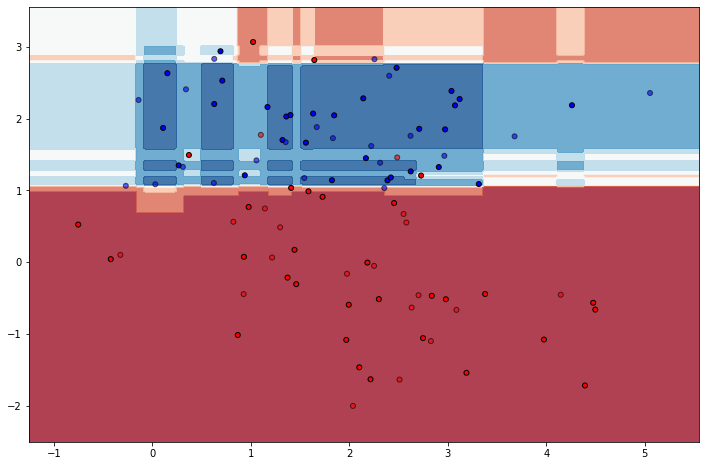

In [20]:
classifiers[2].fit(X_train, y_train)
score = classifiers[2].score(X_test, y_test)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max] x [y_min, y_max].
if hasattr(classifiers[2], "decision_function"):
    Z = classifiers[2].decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = classifiers[2].predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='black', s=25)
# and testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors='black', s=25)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

## Demonstration of generating random function using the magic matrix $\sqrt{K}$
First generate x = np.linspace(0,1,50) which is an array of 50 points which are evenly separated in the intevral [0,1]. Then we generate 50 random numbers from normal distribution, i.e. z = np.normal(0,1, size=50). We can find that:
 - If plotting x against z, it is a random non-smooth function
 - If plotting x against z1, it is a very smooth function.

What is the difference: $z_1 = \sqrt{K}z$.

In [31]:
x_input = np.linspace(0,1,50).reshape(-1,1)

In [32]:
from sklearn.metrics.pairwise import rbf_kernel

K_rbf = rbf_kernel(x_input)

In [34]:
K_rbf.shape

(50, 50)

In [50]:
z = np.random.normal(0,1,size=50)

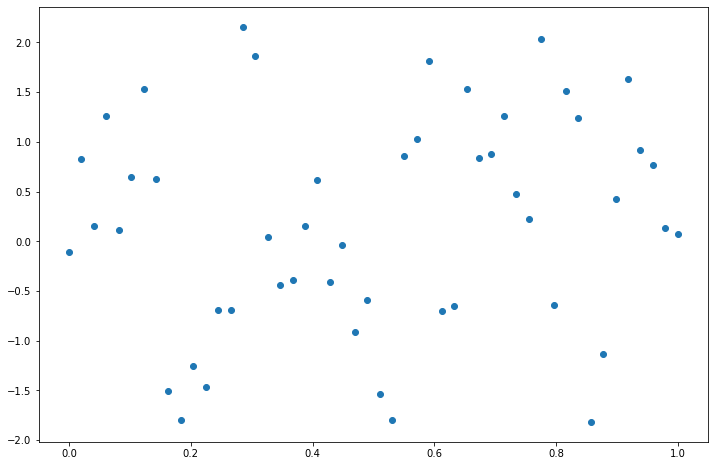

In [51]:
plt.scatter(x_input, z)

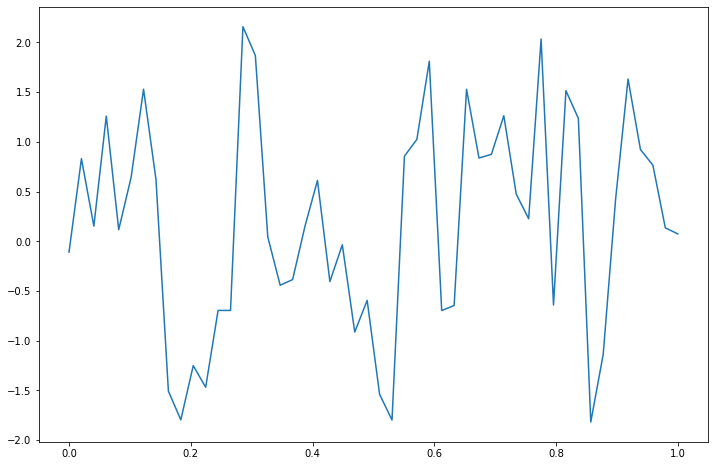

In [52]:
# connecting the dots

plt.plot(x_input, z)

In [53]:
sqrt_K = np.sqrt(K_rbf) 

In [54]:
sqrt_K.shape

(50, 50)

In [55]:
z.reshape(-1,1)
z.shape

(50,)

In [56]:
z1 = np.matmul(sqrt_K,z)

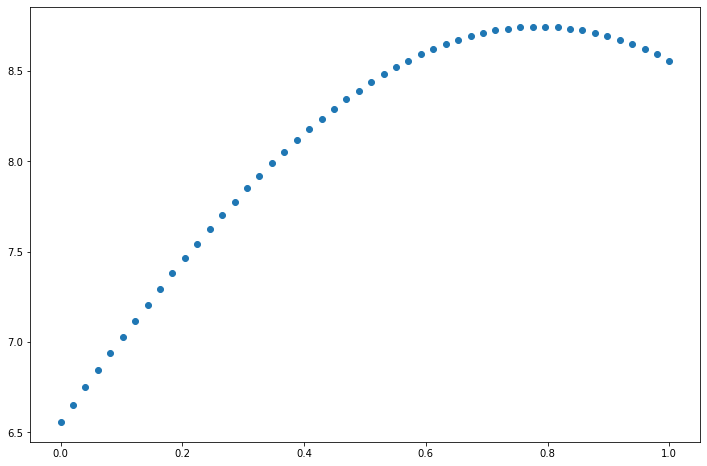

In [57]:
plt.scatter(x_input, z1)